## Face detection with Mtcnn

Neural Network working with Keras


In [8]:
import mtcnn
from mtcnn.mtcnn import MTCNN
import os
import cv2
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm

In [9]:
name_out = ' ' # name for the new folder
folder = ' ' # choose a folder
filenames = os.listdir(folder)

In [10]:
# create new folder if doesn't exist

path_rec = name_out
if not os.path.isdir(path_rec):  
    os.mkdir(path_rec)

In [20]:
# apply Mtcnn classifier and save images in the new folder

conf = []

for filename in tqdm(os.listdir(folder)):
    if filename.endswith('.jpg'):
        file_path = os.path.join(folder, filename)
        image = cv2.imread(file_path)
        detector = MTCNN()
        faces = detector.detect_faces(image)
        for i in faces:
            if i is not None:
                conf.append(i['confidence'])
                treshold = float(0.7)
                if i['confidence'] > treshold :
                    result_path = os.path.join(path_rec, filename)
                    cv2.imwrite(result_path, image)

  0%|          | 0/51 [00:00<?, ?it/s]

  4%|▍         | 2/51 [00:02<01:12,  1.48s/it]

  6%|▌         | 3/51 [00:05<01:26,  1.80s/it]

  8%|▊         | 4/51 [00:06<01:19,  1.70s/it]

 10%|▉         | 5/51 [00:08<01:16,  1.66s/it]

 12%|█▏        | 6/51 [00:09<01:10,  1.57s/it]

 14%|█▎        | 7/51 [00:11<01:14,  1.68s/it]

 16%|█▌        | 8/51 [00:13<01:10,  1.63s/it]

 20%|█▉        | 10/51 [00:15<00:59,  1.44s/it]

 22%|██▏       | 11/51 [00:17<01:02,  1.55s/it]

 24%|██▎       | 12/51 [00:18<00:55,  1.42s/it]

 25%|██▌       | 13/51 [00:19<00:52,  1.37s/it]

 27%|██▋       | 14/51 [00:21<00:56,  1.52s/it]

 29%|██▉       | 15/51 [00:23<00:56,  1.57s/it]

 31%|███▏      | 16/51 [00:25<00:57,  1.65s/it]

 33%|███▎      | 17/51 [00:26<00:53,  1.57s/it]

 35%|███▌      | 18/51 [00:28<00:52,  1.58s/it]

 37%|███▋      | 19/51 [00:29<00:50,  1.56s/it]

 39%|███▉      | 20/51 [00:31<00:48,  1.57s/it]

 41%|████      | 21/51 [00:33<00:48,  1.62s/it]

 43%|████▎     | 22/51 [00:35<00:52,  1.82s/it]

 45%|████▌     | 23/51 [00:36<00:47,  1.68s/it]

 47%|████▋     | 24/51 [00:38<00:45,  1.68s/it]

 49%|████▉     | 25/51 [00:39<00:42,  1.63s/it]

 51%|█████     | 26/51 [00:41<00:41,  1.67s/it]

 53%|█████▎    | 27/51 [00:43<00:41,  1.73s/it]

 55%|█████▍    | 28/51 [00:45<00:39,  1.71s/it]

 57%|█████▋    | 29/51 [00:46<00:34,  1.58s/it]

 59%|█████▉    | 30/51 [00:47<00:30,  1.46s/it]

 61%|██████    | 31/51 [00:49<00:29,  1.49s/it]

 63%|██████▎   | 32/51 [00:50<00:28,  1.49s/it]

 67%|██████▋   | 34/51 [00:53<00:25,  1.50s/it]

 69%|██████▊   | 35/51 [00:55<00:24,  1.55s/it]

 71%|███████   | 36/51 [00:56<00:23,  1.55s/it]

 73%|███████▎  | 37/51 [00:58<00:21,  1.55s/it]

 75%|███████▍  | 38/51 [00:59<00:19,  1.51s/it]

 76%|███████▋  | 39/51 [01:01<00:18,  1.55s/it]

 78%|███████▊  | 40/51 [01:03<00:18,  1.64s/it]

 80%|████████  | 41/51 [01:04<00:15,  1.52s/it]

 82%|████████▏ | 42/51 [01:06<00:14,  1.60s/it]

 84%|████████▍ | 43/51 [01:07<00:12,  1.62s/it]

 86%|████████▋ | 44/51 [01:09<00:10,  1.54s/it]

 88%|████████▊ | 45/51 [01:10<00:08,  1.44s/it]

 90%|█████████ | 46/51 [01:11<00:07,  1.42s/it]

 92%|█████████▏| 47/51 [01:13<00:05,  1.43s/it]

 94%|█████████▍| 48/51 [01:14<00:04,  1.45s/it]

 96%|█████████▌| 49/51 [01:17<00:03,  1.67s/it]

 98%|█████████▊| 50/51 [01:18<00:01,  1.58s/it]

100%|██████████| 51/51 [01:19<00:00,  1.57s/it]


In [21]:
# get percentage of images classified (folders need to only have images)

a = (100 / int(len(os.listdir(folder)))) * int(len(os.listdir(path_rec)))
print(str(round(a, 2))+ "% of images who may contains face(s)")

17.65% of images who may contains face(s)


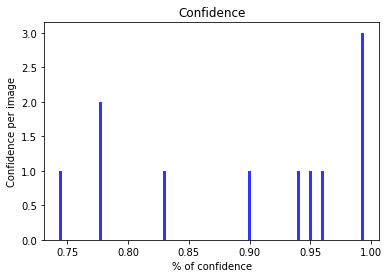

In [23]:
# plot confidence

fig, ax = plt.subplots()
ax.hist(conf, bins=100,color='b',alpha=0.8, histtype="barstacked", label = "Confidence")
ax.set(xlabel='% of confidence', ylabel='Confidence per image',
            title='Confidence')
plt.show()

In [ ]:
# save informations

with open(name_out + '.txt', 'w') as b:
        b.write((str(round(a, 2))+ "% of images may contain face(s)"))
        
plt.savefig(name_out + ".svg")

In [14]:
## Variables informations

#TruePositives
tp = 7

#TrueNegatives
tn = 2

#FalseNegatives
fn = 24

#FalsePositives
fp = 17



In [15]:
# Accuracy

a = round(((tp + tn)/(tp + tn + fn + fp))*100, 2)
print(f"Accuracy is at {a} %")

Accuracy is at 18.0 %


In [16]:
# Recall

r = round((tp /(tp + fn))*100, 2)
print(f"Recall is at {r} %")

Recall is at 22.58 %


In [17]:
# Precision

p = round((tp /(tp + fp))*100, 2)
print(f"Precision is at {p} %")

Precision is at 29.17 %
